#                                 Projeto 1 - Ciência dos Dados

Nome: Fernando Bichuette Assumpção

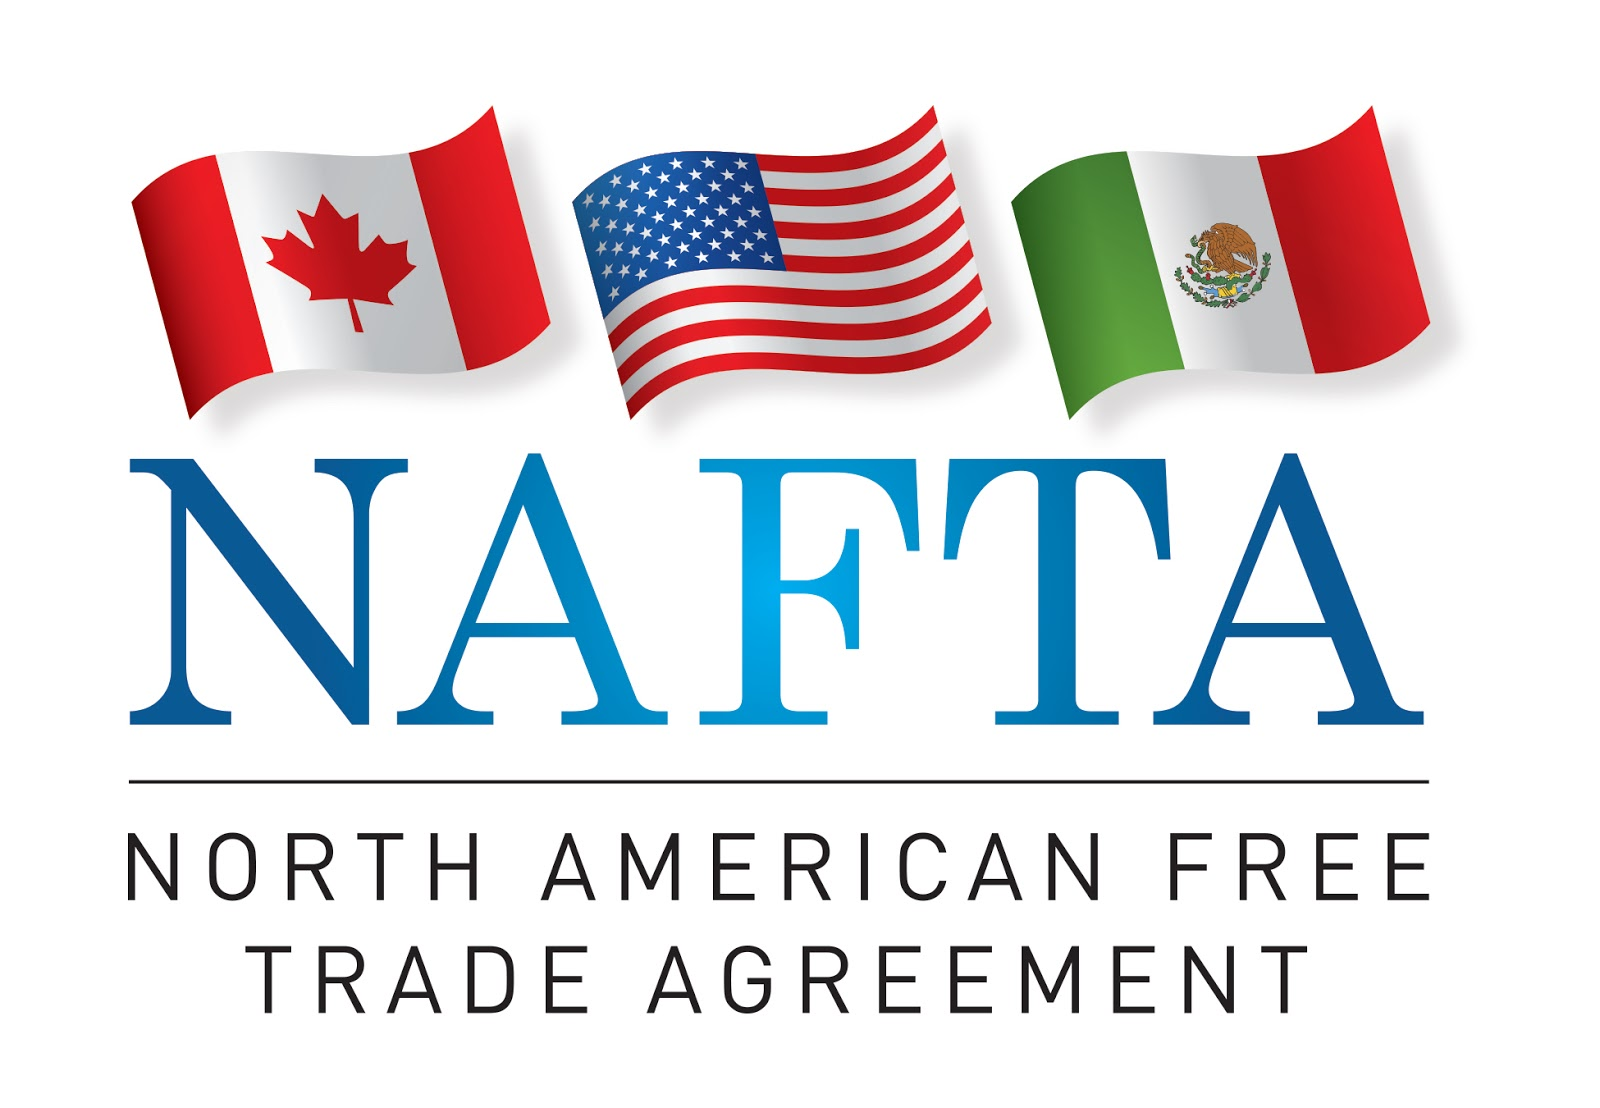     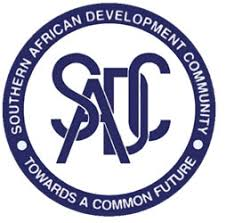

## Pergunta (s) a ser respondida

- O Tratado Norte-Americano de Livre Comércio (NAFTA) impactou positivamente ou negativamente as exportações dos membros do grupo? E nos SADC?


- Há semelhança entre uma eventual melhora de exportação de produtos pos acordo Nafta em comparação entre com os SADC?


- Houve alguma melhora economica no PIB dos paises pós acordo?

## Explicação da hipótese e mecanismo

O NAFTA por ser uma tratado de livre comercio entre a maior potencia economica do mundo os EUA com o Mexico que possui com mão de obra mais barata e grande reservas de petroleo e o Canada que tem uma mão de obra mais qualificada e recursos minerais e vegetais abundantes e todos os respectivos países possuem divisas territoriais proximas pode ter contribuido para um aumento no número de exportação entre esses países ja que as barreiras de importação diminuiram. Com isso,


O proposito do SADC é proporcionar o crescimento das economias dos países africano membro, juntos eles tem um PIB de 226 bilhões de dólares. Ao contrario do NAFTA, o SADC não tem nenhum membro que possui um alto desenvolvimento industrial sendo assim todos os países possuem uma equiparidade entre si. É  provavel então que não haja, por enquanto, um grande salto  econômico pós acordo. 

Minha hipotese é que pode existir alguma relação entre a entrada/criação dos tratados de livre comercio citados acima com um aumento nas exportações assim como um aumento no pib dos países membros.  


Será analizado as variações do crescimento dos graficos de exportação e PIB ao longo do tempo comparando antes do acordo e pós acordo. Alêm disso será utlizado literatura e pesquisa para comprender qual o significado dos dados obitidos. 

## Bases de dados usadas

Insira links para o site de download das bases de dados. Indique quais as variáveis de interesse vêm de cada uma

World Bank: 
             
            Exports of goods and services (% of GDP): https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS
            
       
            GDP growth (annual %): https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG


In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

In [75]:
exportacao = pd.read_excel('exports_percent_of_gdp.xlsx')

In [76]:
produto_interno = pd.read_excel('gdp_total_yearly_growth.xlsx')

# Qualitativo:

Na tabela abaixo apresenta uma tentativa de criar um join com as duas tabelas do excel.

In [77]:
sadc=["Angola","Botswana",'Congo Rep','Lesotho','Malawi','Mauritius','Mozambique','Namibia','Swaziland','Tanzania',
      'Zambia','Zimbabwe','South Africa']

nafta=['EUA','Canada','Mexico']


dados_exp = exportacao.set_index("country")
dados_pib =produto_interno.set_index("country")


EXP_PIB = dados_exp.join(dados_pib, how='inner', lsuffix='_Exp', rsuffix='_Pib')


In [78]:
lista_ex=[]
for a in EXP_PIB.index:
    if a in nafta:
        lista_ex.append(True)
    else:
        lista_ex.append(False)
        
EXP_PIB["Nafta"]=lista_ex

EXP_PIB

,1960_Exp,1961_Exp,1962_Exp,1963_Exp,1964_Exp,1965_Exp,1966_Exp,1967_Exp,1968_Exp,1969_Exp,...,2005_Pib,2006_Pib,2007_Pib,2008_Pib,2009_Pib,2010_Pib,2011_Pib,2012_Pib,2013_Pib,Nafta
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.50,18.60,23.20,13.800,2.39,3.45,3.870,4.96,3.79,False
Botswana,26.30,27.20,27.90,29.00,28.80,31.70,29.30,24.60,23.10,22.80,...,4.15,5.69,4.92,3.200,-4.58,7.11,5.090,4.10,3.79,False
Congo Rep,18.90,9.86,7.75,31.80,33.50,25.90,31.10,15.60,14.50,13.20,...,7.80,5.58,6.26,6.160,2.77,7.19,6.920,6.83,8.11,False
Lesotho,11.70,12.50,14.40,14.90,15.40,15.60,10.90,12.00,12.10,13.60,...,2.70,4.31,4.73,5.390,2.86,5.61,4.200,6.86,6.63,False
Malawi,22.10,20.60,21.40,21.90,19.50,19.50,21.50,24.10,23.80,23.50,...,3.27,4.67,9.62,8.340,8.94,6.68,4.550,2.27,5.40,False
Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.16,4.55,5.60,5.860,2.91,4.26,3.970,3.31,3.10,False
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.29,9.22,7.75,7.240,6.70,7.43,7.640,6.95,6.90,False
Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.20,7.15,5.48,3.460,-1.04,7.65,5.830,5.97,5.20,False
Swaziland,48.30,42.00,47.90,59.20,53.90,65.90,73.20,73.60,75.60,64.90,...,3.16,2.90,14.20,3.500,1.64,2.28,0.525,2.08,2.96,False


# Quantitativos 

Os comandos abaixo tentam criar um grafico de dispersão entre os anos de 1994, 2002 e 2010 relacionando o as exportações e o PIB durante os anos em questão. Isso será feito para ver se houve crescimento econômico durante esse periodo.

In [79]:
Nafta = EXP_PIB.iloc[:,0:54]
Nafta

,1960_Exp,1961_Exp,1962_Exp,1963_Exp,1964_Exp,1965_Exp,1966_Exp,1967_Exp,1968_Exp,1969_Exp,...,2004_Exp,2005_Exp,2006_Exp,2007_Exp,2008_Exp,2009_Exp,2010_Exp,2011_Exp,2012_Exp,2013_Exp
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.30,86.0,79.8,74.0,76.3,54.9,62.3,65.4,63.1,55.7
Botswana,26.30,27.20,27.90,29.00,28.80,31.70,29.30,24.60,23.10,22.80,...,49.60,52.9,52.3,54.5,45.7,34.8,43.6,48.9,48.4,61.5
Congo Rep,18.90,9.86,7.75,31.80,33.50,25.90,31.10,15.60,14.50,13.20,...,22.70,22.9,21.7,39.1,39.0,26.8,41.1,39.5,30.8,36.4
Lesotho,11.70,12.50,14.40,14.90,15.40,15.60,10.90,12.00,12.10,13.60,...,NaN,NaN,NaN,49.2,50.0,41.8,39.4,44.1,38.7,35.8
Malawi,22.10,20.60,21.40,21.90,19.50,19.50,21.50,24.10,23.80,23.50,...,18.80,18.1,17.6,23.3,22.7,20.0,22.8,20.8,26.2,35.7
Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.00,59.9,58.4,55.9,51.1,47.7,51.2,52.4,53.8,48.4
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.90,30.2,30.2,30.8,29.3,30.0,31.5,33.4,32.4,30.4
Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.80,40.4,45.5,50.5,54.4,52.3,47.8,45.5,43.4,41.2
Swaziland,48.30,42.00,47.90,59.20,53.90,65.90,73.20,73.60,75.60,64.90,...,68.60,60.4,59.1,57.3,54.4,52.0,46.5,45.8,44.9,46.7


In [80]:
Nao_Nafta = EXP_PIB.iloc[:,58:112]
Nao_Nafta

,1960_Pib,1961_Pib,1962_Pib,1963_Pib,1964_Pib,1965_Pib,1966_Pib,1967_Pib,1968_Pib,1969_Pib,...,2004_Pib,2005_Pib,2006_Pib,2007_Pib,2008_Pib,2009_Pib,2010_Pib,2011_Pib,2012_Pib,2013_Pib
country,,,,,,,,,,,,,,,,,,,,,
Angola,4.09,13.500,-2.590,5.29,11.300,7.58,5.820,5.800,-1.540,2.96,...,11.20,20.50,18.60,23.20,13.800,2.39,3.45,3.870,4.96,3.79
Botswana,3.29,4.350,3.790,4.28,4.660,4.37,11.300,11.800,11.900,11.40,...,4.15,4.15,5.69,4.92,3.200,-4.58,7.11,5.090,4.10,3.79
Congo Rep,9.54,-10.100,13.700,2.19,0.883,-1.60,6.430,-1.280,6.260,7.90,...,6.64,7.80,5.58,6.26,6.160,2.77,7.19,6.920,6.83,8.11
Lesotho,7.12,0.868,15.500,11.10,8.340,1.58,1.870,10.600,-0.352,1.06,...,2.29,2.70,4.31,4.73,5.390,2.86,5.61,4.200,6.86,6.63
Malawi,2.58,4.940,-0.329,-1.97,-2.350,13.50,9.990,9.640,-1.300,6.42,...,15.80,3.27,4.67,9.62,8.340,8.94,6.68,4.550,2.27,5.40
Mauritius,6.42,23.000,0.696,14.80,-7.200,2.98,-3.830,4.370,-6.910,5.20,...,4.86,3.16,4.55,5.60,5.860,2.91,4.26,3.970,3.31,3.10
Mozambique,2.31,2.780,6.800,-3.65,4.280,2.25,3.160,6.750,11.100,11.80,...,8.57,7.29,9.22,7.75,7.240,6.70,7.43,7.640,6.95,6.90
Namibia,9.28,0.993,14.000,9.95,16.200,6.71,3.810,-4.060,0.854,3.60,...,7.35,5.20,7.15,5.48,3.460,-1.04,7.65,5.830,5.97,5.20
Swaziland,13.60,12.600,20.800,5.42,14.400,15.30,4.090,9.410,-4.630,4.25,...,2.52,3.16,2.90,14.20,3.500,1.64,2.28,0.525,2.08,2.96


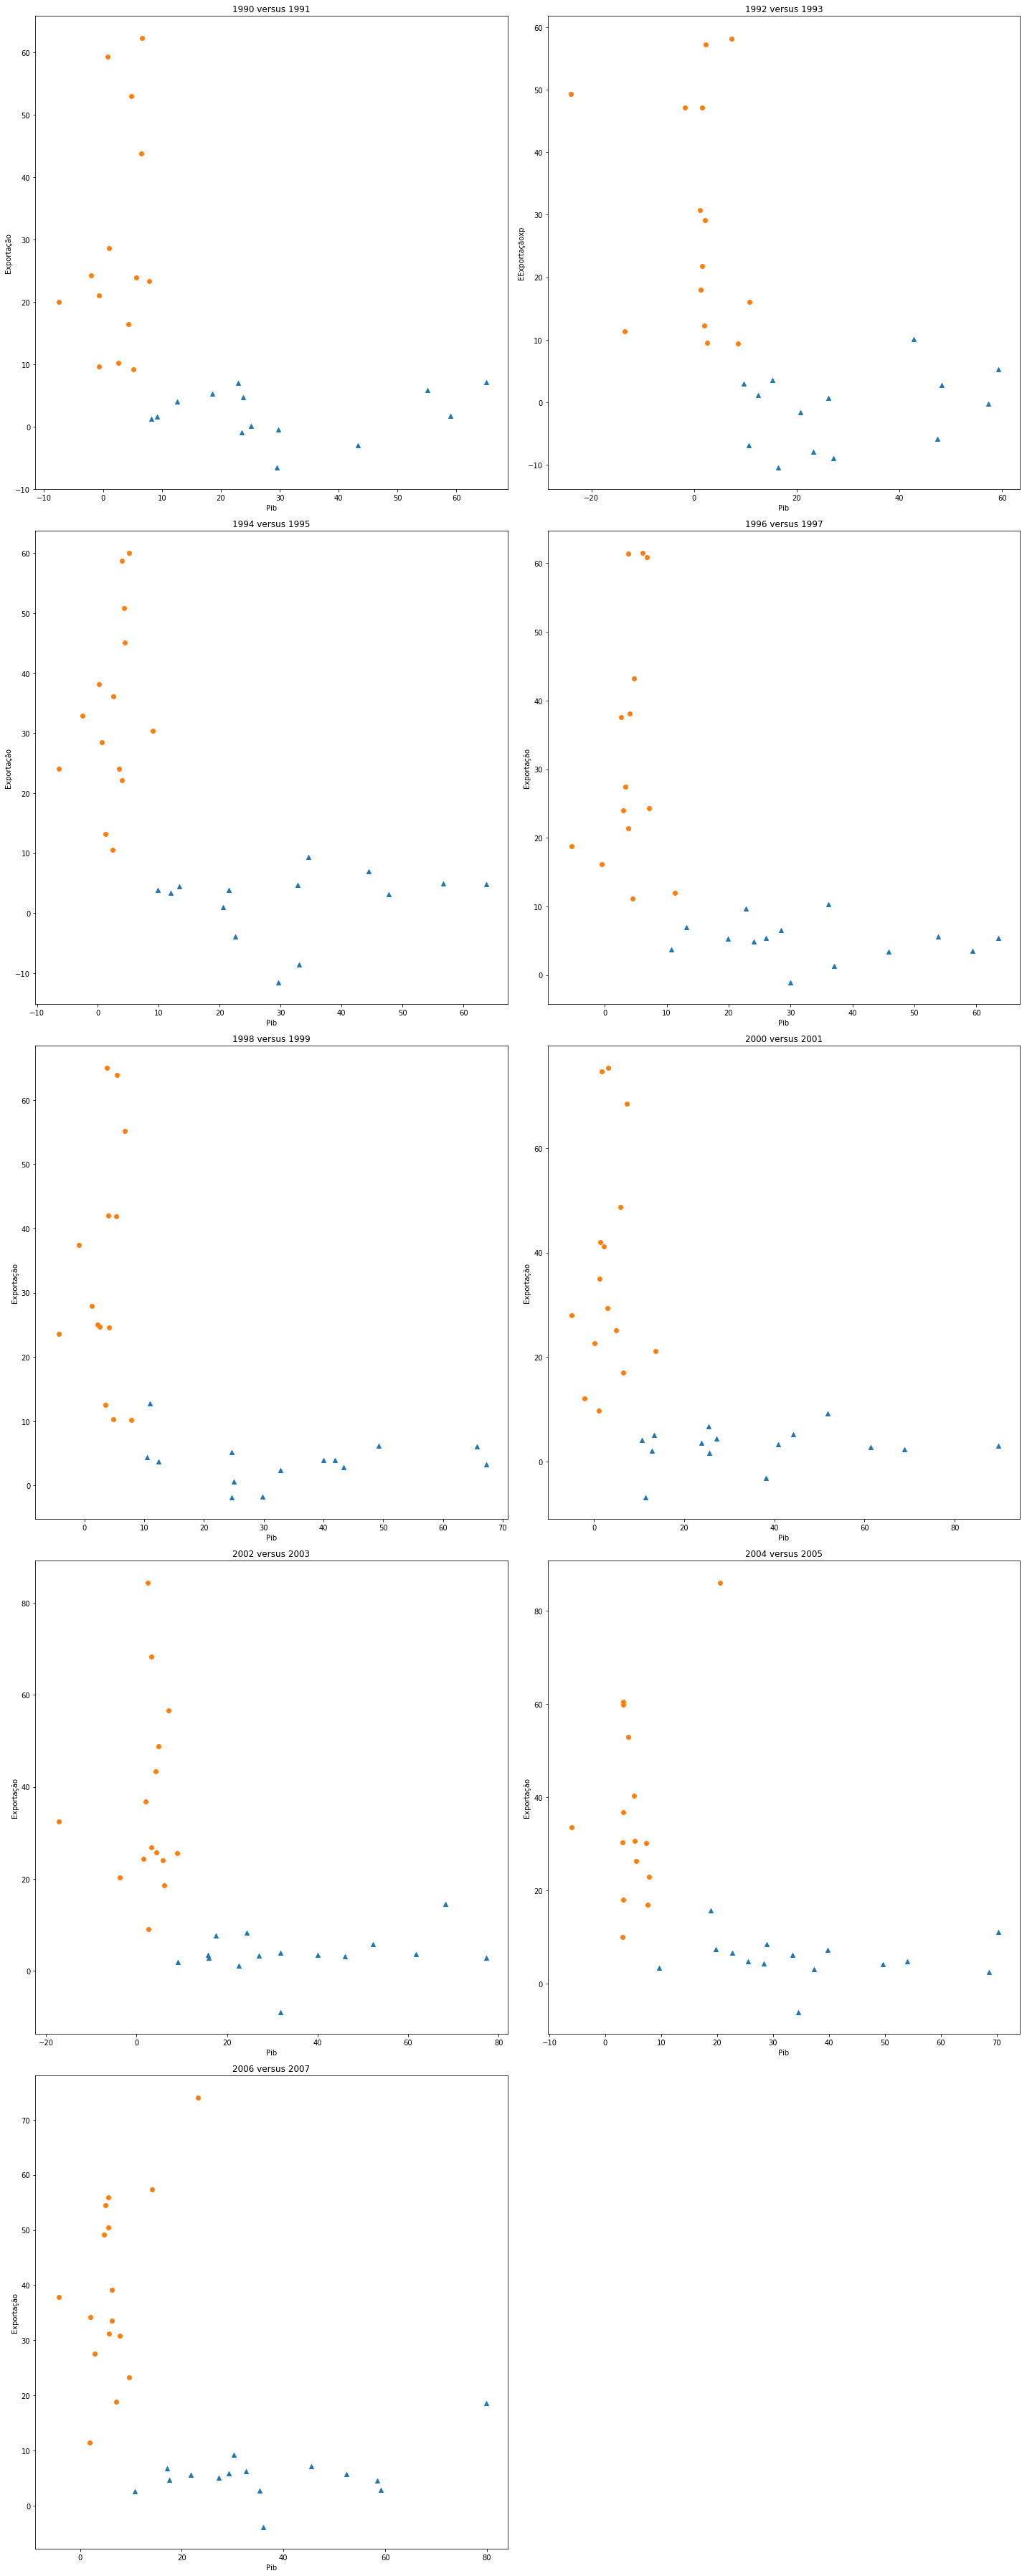

In [81]:
fig = plt.figure(figsize=(20, 50))

plt.subplot(521)
plt.scatter(Nafta['1990_Exp'],Nao_Nafta['1990_Pib'],marker='^')
plt.scatter(Nao_Nafta['1991_Pib'],Nafta['1991_Exp'],marker='o')
plt.title('1990 versus 1991')
plt.xlabel('Pib')
plt.ylabel('Exportação')

plt.subplot(522)
plt.scatter(Nafta['1992_Exp'],Nao_Nafta['1992_Pib'],marker='^')
plt.scatter(Nao_Nafta['1993_Pib'],Nafta['1993_Exp'],marker='o')
plt.title('1992 versus 1993')
plt.xlabel('Pib')
plt.ylabel('EExportaçãoxp')


plt.subplot(523)
plt.scatter(Nafta['1994_Exp'],Nao_Nafta['1994_Pib'],marker='^')
plt.scatter(Nao_Nafta['1995_Pib'],Nafta['1995_Exp'],marker='o')
plt.title('1994 versus 1995')
plt.xlabel('Pib')
plt.ylabel('Exportação')


plt.subplot(524)
plt.scatter(Nafta['1996_Exp'],Nao_Nafta['1996_Pib'],marker='^')
plt.scatter(Nao_Nafta['1997_Pib'],Nafta['1997_Exp'],marker='o')
plt.title('1996 versus 1997')
plt.xlabel('Pib')
plt.ylabel('Exportação')



plt.subplot(525)
plt.scatter(Nafta['1998_Exp'],Nao_Nafta['1998_Pib'],marker='^')
plt.scatter(Nao_Nafta['1999_Pib'],Nafta['1999_Exp'],marker='o')
plt.title('1998 versus 1999')
plt.xlabel('Pib')
plt.ylabel('Exportação')


plt.subplot(526)
plt.scatter(Nafta['2000_Exp'],Nao_Nafta['2000_Pib'],marker='^')
plt.scatter(Nao_Nafta['2001_Pib'],Nafta['2001_Exp'],marker='o')
plt.title('2000 versus 2001')
plt.xlabel('Pib')
plt.ylabel('Exportação')

plt.subplot(527)
plt.scatter(Nafta['2002_Exp'],Nao_Nafta['2002_Pib'],marker='^')
plt.scatter(Nao_Nafta['2003_Pib'],Nafta['2003_Exp'],marker='o')
plt.title('2002 versus 2003')
plt.xlabel('Pib')
plt.ylabel('Exportação')

plt.subplot(528)
plt.scatter(Nafta['2004_Exp'],Nao_Nafta['2004_Pib'],marker='^')
plt.scatter(Nao_Nafta['2005_Pib'],Nafta['2005_Exp'],marker='o')
plt.title('2004 versus 2005')
plt.xlabel('Pib')
plt.ylabel('Exportação')

plt.subplot(529)
plt.scatter(Nafta['2006_Exp'],Nao_Nafta['2006_Pib'],marker='^')
plt.scatter(Nao_Nafta['2007_Pib'],Nafta['2007_Exp'],marker='o')
plt.title('2006 versus 2007')
plt.xlabel('Pib')
plt.ylabel('Exportação')


plt.tight_layout()
plt.show()

## Conclusão

Com os graficos acima é possivel perceber que a hipotese elaborada no começo do trabalho é falsa. Em nos graficos de disperção Exportação por PIB mostra que não há relação alguma entre os dois. É possivel notar que mesmo que haja um aumento nos números de exportação durante os anos subsequente a criação dos tratados não houve um aumento significativo no PIB. Isso pode ter relação com as instabilidades economicas/politicas alguns paises analizados e a dificudade de competir com os produtos chineses que, possuem um preço mais competitivo e uma qualidade tecnica melhor.